#  Learn the theory of Linear Regression with python implementation

## What is a linear regression?

Linear regression is a statistical procedure for finding the relationship between two (or more) continuous quantitative variables. For example, a real estate agent knows that the square footage of the house is related to the price of the property. **Machine learning** embraced this idea and used it to predict an unknown quantity (called a dependent variable) from known quantities of another variable (called an independent or predictor variable). That means that if we know the square footage of a house, we can predict the cost of it. 

When it comes to **relationships**, there are *three types*. We have already discussed the **statistical relationship** in the example of houses. It is a combination of **deterministic** and **random relationship** and is the most common due to it approach more the daily life problems. The deterministic relation is a perfect prediction of the dependent variable. These can be mathematical equations such as $Fahrenheit = 1.8*Celsius+32$. Random relationships, on the other hand, are those in which there are no relationships between variables.

![Deterministic vs Statistical relationship](images/deterministicVSstatistical.jpeg "Deterministic vs Statistical relationship")

## Linear regression intuition

In machine learning we call the simplest model of linear regression, simple linear regression. Let's apply this model to our first example, the prediction of house pricing. In our assumption a friend of ours want to sell his house of 1000 square feet and he wants us to predict an estimation of the price. So, how you start?

First of all, we need to collect data on homes for sale in the same neighborhood as our friend's property. 

In [1]:
# Import the required libraries
#
# import pandas
import pandas as pd
# import numpy
import numpy as np
np.seterr(all='warn')

# import matplotlib for visualization 
import matplotlib.pyplot as plt

# Read your collected data
data = pd.read_csv("houses_price_sqft.csv")

# Project the first 5 rows of your data
data.head()

,sqft,price
0,10655,284.0
1,10000,16.0
2,7000,136.5
3,9179,193.0
4,10400,174.0


Once we have done that we are able to plot the data on a scatter plot:

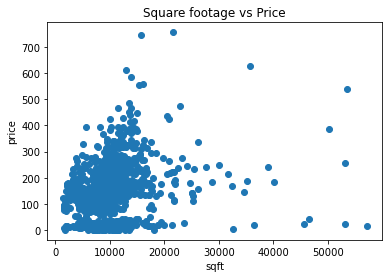

In [2]:
# Scatter plot
# Square footage vs Price

plt.scatter(data["sqft"], data["price"])
plt.title("Square footage vs Price")
plt.xlabel("sqft")
plt.ylabel("price")
plt.show()

By designing this plot, we have a visual representation of the dependent variable value and the independent variable, which is the square footage. Now the only part that is missing from our problem is to find a formula to predict the house price based on the data we have collected. And such a formula could be similar like the Fahrenheit conversion into Celsius.

Therefore, we need to convert this equation of:

\begin{equation}
Fahrenheit = 1.8 * Celsius + 32
\end{equation}

to a house price prediction one:

\begin{equation}
price = a * sqft + b
\end{equation}

where:

* a = slope of the line
* b = Y-intercept of the line
* price = Y coordinate of the point from which the line passes through
* sqft = X coordinate of the point from which the line passes through

This formula in the world of machine learning is called a hypothesis. It is a Greek word("υπόθεση"), and its semantic meaning is "an idea or explanation for something based on known facts". The symbol we use to indicate that this function is a hypothesis is the letter h. Therefore, our formula can be $h(x) = a * x + b $.

## The slope and the intercept point

As a coefficient of direction or as the inclination of a line, we define the slope of the angle of the line formed by a with the x'x axis. The direction coefficient of the line is positive if the angle is acute, negative if the angle is obtuse and zero if the angle is zero. In the case where the angle is equal to 90 °, i.e. when the line is perpendicular to the x'x axis, we do not define a steering coefficient a.

![Slope types](images/slopes.png "Slope types")

We can calculate the slope if we know two coordinates (x1, y1), (x2, y2) by solving the equation:

\begin{equation}
a = \frac{y_2 - y_1}{x_2 - x_1}
\end{equation}

For example, let's grap the first 2 entries:

\begin{align*}
(x1, y1) = (10655, 284) && (x2, y2) = (10000, 160) \\ \\
\end{align*}

\begin{equation} \label{eq1}
\begin{split}
a & = \frac{160 - 284}{10000 - 10655} \\ \\
 & = \frac{124}{655} \\ \\
 & = 0.19
\end{split}
\end{equation}



And since we know all the other variables by choosing a coordinate we can solve $b = y_1 - a * x_1$ to find the intercept and the hypothesis will be completed.

\begin{equation} \label{eq1}
\begin{split}
b & = y_1 - a * x_1 \\ \\
 & = 284 - 0.19*10655 \\ \\
 & = -1740.45 \\ \\ 
\end{split}
\end{equation}

Notice that we can use any of the points to calculate the intercept value. The answer to the slope will always be the same for the same straight line. Next, since we have all our parameters, we can write the equation of line as:

\begin{equation}
\tag*{,where x is the sqft} h(x) = 0.19 * x -1740.45
\end{equation}


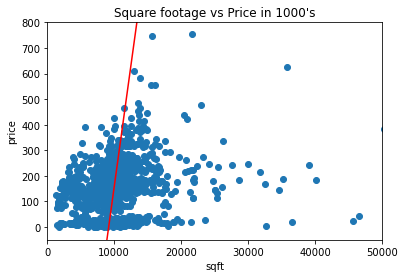

In [3]:
plt.scatter(data["sqft"], data["price"])
plt.ylim(-50, 800)
plt.xlim(0, 50000)
plt.plot([1300, 50000],[-1493.45, 7759.55],color="red")
plt.title("Square footage vs Price in 1000's")
plt.xlabel("sqft")
plt.ylabel("price")
plt.show()

## Calculating the Linear Best Fit

As we can see by selecting two random points, the line passes through all the points. In machine learning to achieve this, we present a function called a cost function. Our goal is to minimize the result of the cost function until it meets a minimization threshold. The line with the minimum cost is called the **linear best fit**.

![Linear best fit](images/linearBestFit.png "Linear best fit")

As discussed above, our goal is to find the linear best fit from the given dataset. Therefore we need to find a way to calculate the cost function. So, a question arises, how do we calculate the cost function?

In the figure above, the red line represents the regression line like the one we found in the previous section. The green horizontal bars are the error of each data point in our data set. More straightforwardly, this means how far our prediction was from the actual data point. Mathematically we can represent the error term as:

\begin{equation}
 error_i = yi_{actual} - yi_{predicted}
\end{equation}

Therefore, we can use the error calculation technique to find the error in the prediction for each of the data points. So all we need to do is summarize all these error results, and finally, we will find an equation for calculating the cost, which is:

\begin{equation}
 J = \textstyle\frac{1}{2 m} \sum_{i=1}^n (yi_{actual} - yi_{predicted})
\end{equation}

To account for the negative values, we will square the errors.

\begin{equation}
 J = \frac{1}{2 m} \sum_{i=1}^n (yi_{actual} - yi_{predicted})^2
\end{equation}

Now, we need to find the parameters of a line that has the least error. Once we have this, we can form an equation of a line that is the linear best fit.

## Searching the parameters for the Linear Best Fit

There multiple ways to adjust the parameters of the hypothesis to get the linear best fit. The most popular is **gradient descent** and the **normal equation**.

Before we dive into that, we must introduce the standard notation. At this point, I kept the parameter names as simple as possible. In the world of machine learning, you are more likely to see the parameter names as $\theta_i$. Due to that fact, we represent our hypothesis $h(x) = b + a * x  $ equation as:

\begin{equation}
h_{\theta}(x) = \theta_0 + \theta_1 x
\end{equation}

, where $h_\theta$ means that our function is parametrize by $\theta$.

In terms of our dataset notation, it would be easier for us if we could specify the $i_{th}$ training example. Let's begin by graping the first 3 rows and the size of our dataset.

In [4]:
# Project the first rows of your data
data.head(3)

,sqft,price
0,10655,284.0
1,10000,16.0
2,7000,136.5


In [5]:
# Get the size of our dataset
print("Dataset size: {size}".format(size=data.shape[0]))

Dataset size: 1454


|  sqft(x) 	|   price(y) in 1k	|
|:---------:|:-----------------:|
|10655      |    284            |
|1000  	    |    160 	        |
|7000    	|   1365  	        |
| ...       |    ...    	    |

**Notation:**

$\textrm{m = Number of training examples} \implies \textrm{m = 1454}$

$\textrm{x's = "input" features} \implies \textrm{ie: } x^{(1)} = 10655 \textrm{, } x^{(3)} = 7000$

$\textrm{y's = "output" or "target" variable} \implies \textrm{ie: } y^{(1)} = 284$

$(x^{(i)}, y^{(i)}) \implies i_{th} \textrm{ training example}$

With this notation we can describe which feature we are referring to and which target value. With that said, we can start our calculations for the linear best fit finding!

### Gradient descent

So we have our hypothesis function and we have a way of measuring how well it fits into the data. Now we need to estimate the parameters in the hypothesis function. That's where gradient descent comes in. To keep this tutorial as small as possible I will cover the basic of gradient descent algorithm, and a in-depth cover in later tutorials. 

Imagine standing on top of a valley with a ball in your hand. To find out how far this ball can go, we let it roll to the deepest part of the valley. Since at the beginning of the movement of the ball, the valley is steeper, the ball descent faster. However, as soon as it is about to reach the bottom, the surface will become more vertical, and the ball will slow down.

![Gradient descent](images/gsd.png "Gradient descent")

We will know that we have succeeded when our cost function is at the very bottom of the pits in our graph, i.e. when its value is the minimum. That's is basically the idea of the gradient descent. The gradient descent algorithm is:

$\textrm{repeat until convergence: } $

\begin{equation}
\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1)
\end{equation}

$\textrm{ where: } $
* j, represents the feature index number.
* a, the learning rate -  ensure that the gradient descent algorithm converges in a reasonable time. 

When applied specifically in the case of linear regression, a new form o equation occurs. We can replace the cost function and the hypothesis function and modify the equation into:

$\textrm{repeat until convergence: } \lbrace $

\begin{equation}
\theta_0 := \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^n (h_{\theta}(x) - y_i)
\end{equation}

\begin{equation}
\theta_1 := \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^n ((h_{\theta}(x_i) - y_i)x_i)
\end{equation}

 $\rbrace $
 
So, let's see how it looks like in the Python programming language:

Tip: Normalize your data! $z = \frac{xi - \mu}{\sigma}$

In [6]:
# Initialize target variable
y = data['price'].to_numpy().reshape(1454, 1)

# Initialize fitting parameters
theta = np.zeros((2,1))

# Initialize gradient descent settings
iterations = 2000;
alpha = 0.001;

# initialize number of training examples
m = y.size

# Get your feautures
X = data
X = X[["sqft"]].to_numpy()

# Normalize your data
X_norm = X.copy()
mu = np.zeros(X.shape[1])
sigma = np.zeros(X.shape[1])

mu = np.mean(X, axis = 0)
sigma = np.std(X, axis = 0)
X_norm = (X - mu) / sigma
X = X_norm

# Add a column of intercept
X = np.hstack((np.ones((m,1)), X))

In [7]:
print(X)

[[ 1.          0.12172427]
 [ 1.         -0.00339841]
 [ 1.         -0.5764794 ]
 ...
 [ 1.         -0.36157403]
 [ 1.          0.73396579]
 [ 1.         -0.28993891]]


In [8]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression.
    
    Parameters
    ----------
    X : array_like
        The values that represents the input features + the intercept point
        of shape (m x n+1), where m is the number of examples, and n is the
        number of features.
    y : array_like
        The target variable. It is a vector of shape (m, ).
    
    theta : array_like
        A vector of shape (n+1, ) which represents the parameters.
    
    Returns
    -------
    J : float - The value of the cost function.
    
    """
    
    # number of training examples
    m = np.size(y, axis=0)
    
    # Initialize cost variable
    J = 0
    
    # initialize hypothesis
    h_theta = np.dot(X, theta)
    
    # Calculate the cost
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    # Return Cost
    return J

In [9]:
J = computeCost(X, y, theta)
print(J)

15269.773052640305


In [10]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta
    
    Parameters
    ----------
    X : array_like
        The values that represents the input features + the intercept point
        of shape (m x n+1), where m is the number of examples, and n is the
        number of features.
    y : array_like
        The target variable. It is a vector of shape (m, ).
    
    theta : array_like
        A vector of shape (n+1, ) which represents the parameters.
    
    Returns
    -------
    theta: array_like - The optimal parameters
    J_history : array_like - The history of the cost.
    
    """
    # number of training examples
    m = np.size(y, axis=0)
    
    # Initialize some useful values
    J_history = []
    
    # are passed by reference to functions
    theta = theta.copy()
    
    for iter in range(num_iters):
        # initialize hypothesis
        h_theta = np.dot(X, theta)

        # calculate the thetas
        # (2,1) = (2,1) - ( 2, 1454  ).dot(1454x1 )
        theta = theta - (alpha / m) * (X.T).dot(h_theta - y)
        
        # Save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

In [11]:
# run gradient descent
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

# print theta to screen
print('Theta found by gradient descent: {0}, {1}'.format(theta[0], theta[1]))

Theta found by gradient descent: [125.35818206], [18.30886644]


In order to be sure that our cost function decrease over time, which means it approaches the global minimum, we can plot it over the iterations: 

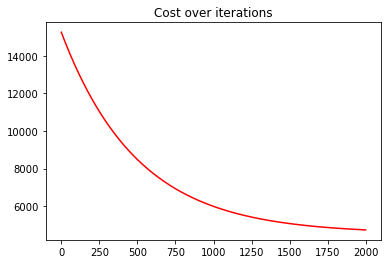

In [12]:
plt.title("Cost over iterations")
plt.plot(J_history, label='Cost function', color='red')

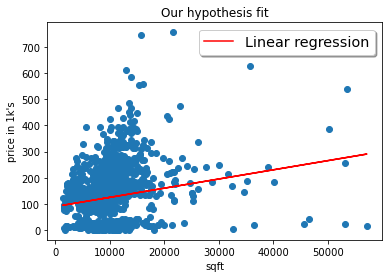

In [13]:
plt.scatter(data["sqft"], data["price"])
plt.title("Our hypothesis fit")
plt.xlabel("sqft")
plt.ylabel("price in 1k's")

plt.plot(data["sqft"], X.dot(theta), '-', label='Linear regression', color='red')
plt.legend(loc='upper right', shadow=True, fontsize='x-large', numpoints=1)

plt.show()

In [14]:
# Predict values for population sizes of 35,000 and 70,000
predict = np.dot([1, 1000], theta)
print('For sqft = 1000, we predict that our friend should sell his property \nfor {:.2f} euros/dollars \n'.format(predict[0]*1000))

For sqft = 1000, we predict that our friend should sell his property 
for 18434224.62 euros/dollars 



### Conclusion!

Our hypothesis is best suited to our data, as can be seen from the plot, which leads us to a better prediction than the old one.

In conclusion, a simple linear regression estimates the relationship between two quantitative variables. Once we have this line, we can predict the value of the dependent variable based on the value of the independent variable using the line equation and the optimal parameters.